
# PTID-CDS-JAN-23-1448
# Client: Bank GoodCredit | Category: Banking - Risk
# Project Ref: PM-PR-0015

## Business Case
Bank GoodCredit wants to predict cred score for current credit card 
customers. The cred score will denote a customer’s credit worthiness 
and help the bank in reducing credit default risk
-Target variable → Bad_label
-0  Customer has Good credit history
-1  Customer has Bad credit history

## Domain Analysis
### There are three tables assoicated with the dataset. 

### Customer Account Data (Table : Cust_Account): This table contains customer’s historical accounts data and payments history .

### Customer Enquiry Data (Table : Cust_Enquiry):This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

### Demographics Data (Table : Cust_Demographics): Current customer applications with demographic data Note that demographics features are renamed as features and obscured in accordance with privacy policies.

### Some of the features are :

### payment_history_avg_dpd_0_29_bucket--mean count of accounts that is in 0-29 dpd bucket throughout the payment history 

### acct_type -- Type of the account a customer holds.

### opened_dt-- Date on which the customer has opened the account.

### last_paymt_dt -- Date on which last payment was made by customer.

### High_credit_amt-- Highest balance or highest amount of credit ever used.

### cur_balance_amt -- Current balance in the customer account.

### amt_past_due -- Payment that has not been made by its cutoff time.

### creditlimit -- The credit limit is the total amount that you can borrow.

### cash limit -- The cash you can draw per day.

### rateofinterest -- The amount charged over and above the principal amount by the lender from the borrower.

### paymentfrequency -- How often the payment is made.

### actualpaymentamount -- The actual amount to be paid by customer.

In [1]:
# importing all the necessary library.
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
import mysql

In [3]:
import mysql.connector

# Connecting to Database

In [4]:
# making connections to database server
connection = mysql.connector.connect(host ='18.136.157.135', # IP-address of data-base
                                    user ='dm_team1', # data-base Username
                                    password ='DM!$Team&279@20!',
                                    database ='project_banking') # data-base Password

In [5]:
connection

In [6]:
# Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [7]:
database_tables=pd.read_sql_query('show tables',connection)
print(database_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


## CUSTOMER ACCOUNT TABLE


In [8]:
query_1='select *from Cust_Account'
d=pd.read_sql(query_1,connection)
pd.set_option('display.max_columns',None)
print(d.shape)
d.head()

(186329, 21)


,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


In [9]:
## taking necessary columns 

acc_columns = ['customer_no','high_credit_amt','cur_balance_amt','cashlimit','creditlimit']
data_acc = d.loc[:,acc_columns]
data_acc.head()

,customer_no,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,12265,20900,0,,
1,12265,16201,10390,1400,14000
2,12265,41028,34420,,
3,15606,93473,0,,
4,15606,20250,13500,,


In [10]:
acc_group = data_acc.groupby(['customer_no']) ## grouping the data by customer number


In [11]:
acc_group.head()

,customer_no,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,12265,20900,0,,
1,12265,16201,10390,1400,14000
2,12265,41028,34420,,
3,15606,93473,0,,
4,15606,20250,13500,,
...,...,...,...,...,...
186317,1611,97741,0,,
186318,1611,300000,287017,,
186319,1611,34001,0,,
186320,1611,42320,0,,42490


In [12]:
account = pd.DataFrame(acc_group.sum()).reset_index()
account.head()

,customer_no,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000
1,10,1111113565675230005500000531458600000111851500...,068994000178725000000,243000,405000
2,100,747754333541229800010000454945000034240350000,3970033460980316015530000,980017700,300009800059000
3,1000,548289548289147688,31349029113,6750081000,225000270000
4,10000,52590480000562501997410200520000,1752758222031250-26123003454770,10000,60000


In [13]:
account.shape

(23896, 5)

In [14]:
account.to_csv('Cust_Account_data.csv',index=False)  ## converting data to csv 

## CUSTOMER ENQUIRY DATA 


In [15]:
query_3 = 'select *from Cust_Enquiry'
d2= pd.read_sql(query_3,connection)
pd.set_option('display.max_columns',None)
print(d2.shape)
d2.head()

(413188, 6)


,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000


In [16]:
## taking necessary columns 
d_enquiry=d2.loc[:,['customer_no','enq_amt']]
d_enquiry.head()

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000


In [17]:
enquiry_group = d_enquiry.groupby(['customer_no'])
enquiry_group.head()

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000
...,...,...
413172,23896,10000
413173,23896,1000
413174,23896,15000
413175,23896,1000


In [18]:
enquiry_data_count = pd.DataFrame(enquiry_group.count()).reset_index()
enquiry_data_count.columns = ['customer_no','total_enq_count']
enquiry_data_count.head(5)

,customer_no,total_enq_count
0,1,18
1,10,21
2,100,19
3,1000,10
4,10000,14


In [19]:
enquiry_data_amt=pd.DataFrame(enquiry_group.sum()).reset_index()
enquiry_data_amt.columns = ['customer_no','total_enq_amt']
enquiry_data_amt.head(5)

,customer_no,total_enq_amt
0,1,3500000500000500005000010001000100010001000150...
1,10,2000000200000002000000055000005500000100050000...
2,100,5000010000110000130000030000040000010000100001...
3,1000,10000100010000100001000050000500005000010001000
4,10000,9000200002220005000010000050000500005000056250...


In [20]:
enquiry_data_amt.shape

(23896, 2)

In [21]:
enquiry_data =pd.merge(enquiry_data_count,enquiry_data_amt,on='customer_no',how='inner')
enquiry_data.head()

,customer_no,total_enq_count,total_enq_amt
0,1,18,3500000500000500005000010001000100010001000150...
1,10,21,2000000200000002000000055000005500000100050000...
2,100,19,5000010000110000130000030000040000010000100001...
3,1000,10,10000100010000100001000050000500005000010001000
4,10000,14,9000200002220005000010000050000500005000056250...


In [22]:
enquiry_data.to_csv('Cust_enquiry_data.csv',index=False)

## CUSTOMER DEMOGRAPHIC  DATA 

In [23]:
query_2 = 'select *from Cust_Demographics'
d3=pd.read_sql(query_2,connection)
pd.set_option('display.max_columns',None)
print(d3.shape)
d3.head()

(23896, 83)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


In [24]:
d3.to_csv('Cust_Demographics_data.csv',index=False)

In [25]:
# Combining data from all the three tables into dataframe.

data_merge=pd.merge(d3,account,on='customer_no', how='inner')
print(data_merge.shape)
data_merge.head()

(23896, 87)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,cashlimit,creditlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,1,1000000
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,


In [26]:
data=pd.concat([data_merge,enquiry_data],axis=1)
print(data.shape)
data.head()

(23896, 90)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,customer_no,total_enq_count,total_enq_amt
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,1,18,3500000500000500005000010001000100010001000150...
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,1,1000000,10,21,2000000200000002000000055000005500000100050000...
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,,100,19,5000010000110000130000030000040000010000100001...
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,1000,10,10000100010000100001000050000500005000010001000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,,10000,14,9000200002220005000010000050000500005000056250...


In [27]:

## Converting data to csv
data.to_csv('Bank_GoodCredit_data.csv')

In [28]:
data=pd.read_csv('Bank_GoodCredit_data.csv')

In [29]:
data

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,1,1000000,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822042204,7973000000,NaN,NaN,10000,14,900

In [30]:
#Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
print(data)

       Unnamed: 0  dt_opened  customer_no entry_time        feature_1  \
0               0  18-Apr-15            1  13-Apr-15         Insignia   
1               1  21-Apr-15            2  21-Apr-15         Insignia   
2               2  22-Apr-15            3  21-Apr-15         Insignia   
3               3  25-Apr-15            4  15-Apr-15         Insignia   
4               4  06-May-15            5  30-Apr-15         Insignia   
...           ...        ...          ...        ...              ...   
23891       23891  31-Dec-15        23892  10-Dec-15  Platinum Deligh   
23892       23892  17-Dec-15        23893  16-Nov-15  Platinum Deligh   
23893       23893  04-Nov-15        23894  24-Sep-15  Platinum Maxima   
23894       23894  03-Nov-15        23895  30-Sep-15  Platinum Deligh   
23895       23895  04-Dec-15        23896  06-Nov-15  Titanium Deligh   

       feature_2  feature_3  feature_4   feature_5  feature_6  feature_7  \
0      13-Apr-15      650.0        2.0  Card Se

# BASIC CHECKS

In [31]:
data.shape

(23896, 91)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23896 non-null  int64  
 1   dt_opened        23896 non-null  object 
 2   customer_no      23896 non-null  int64  
 3   entry_time       23881 non-null  object 
 4   feature_1        23881 non-null  object 
 5   feature_2        21060 non-null  object 
 6   feature_3        21060 non-null  float64
 7   feature_4        23881 non-null  float64
 8   feature_5        23881 non-null  object 
 9   feature_6        23881 non-null  float64
 10  feature_7        23881 non-null  float64
 11  feature_8        1261 non-null   object 
 12  feature_9        1261 non-null   object 
 13  feature_10       51 non-null     object 
 14  feature_11       23881 non-null  object 
 15  feature_12       23881 non-null  object 
 16  feature_13       10892 non-null  object 
 17  feature_14  

In [33]:
# Statistical details for numerical variable
data.describe()

,Unnamed: 0,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,customer_no.1,total_enq_count
count,23896.000000,23896.000000,21060.000000,23881.000000,23881.0,2.388100e+04,16163.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,1.040000e+02,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,17.000000,23881.000000,23881.000000,23896.000000,23896.000000,23896.000000
mean,11947.500000,11948.500000,723.235945,2.321595,14.0,1.190705e+05,8.086618,1.049412,1.233910,0.725640,217620.229346,2001.183996,0.652318,1.238851,3.278933e+04,1533.268707,3.348352,5.702609,0.154139,222251.238474,2.724312e+11,6.500073e+04,1.085717,13.337465,14.587454,157.609732,264374.021440,0.184373,1.238851,3.278933e+04,14.539048,2.411765,0.003852,1.043214,0.042015,11948.500000,17.291095
std,6898.325352,6898.325352,37.318684,0.892838,0.0,7.752349e+04,5.625654,0.216731,0.423324,1.124986,159267.102213,11.993426,2.343709,0.430009,1.087860e+05,855.273257,3.587043,4.159316,0.930806,156846.154943,1.223114e+11,1.008225e+05,0.388569,8.285993,9.518517,190.979066,202001.890433,0.387796,0.430009,1.087860e+05,9.077906,0.618347,0.084286,0.224672,0.200628,6898.325352,15.248175
min,0.000000,1.000000,-1.000000,1.000000,14.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,110001.000000,1964.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.568570e+05,0.000000e+00,1.000000,2.000000,2.000000,1.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5973.750000,5974.750000,698.000000,1.000000,14.0,7.200000e+04,0.000000,1.000000,1.000000,0.000000,110051.000000,1991.000000,0.000000,1.000000,1.000000e+00,1999.000000,0.000000,1.000000,0.000000,110044.000000,3.090000e+11,0.000000e+00,1.000000,10.000000,10.000000,39.000000,110059.000000,0.000000,1.000000,1.000000e+00,10.000000,2.000000,0.000000,1.000000,0.000000,5974.750000,7.000000
50%,11947.500000,11948.500000,721.000000,3.000000,14.0,1.040000e+05,12.000000,1.000000,1.000000,0.000000,110094.000000,2005.000000,0.000000,1.000000,3.000000e+04,2010.000000,2.000000,6.000000,0.000000,122001.000000,3.090000e+11,5.000000e+04,1.000000,10.000000,10.000000,157.000000,122012.000000,0.000000,1.000000,3.000000e+04,10.000000,2.000000,0.000000,1.000000,0.000000,11948.500000,13.000000
75%,17921.250000,17922.250000,745.000000,3.000000,14.0,1.390000e+05,12.000000,1.000000,1.000000,2.000000,390002.000000,2011.000000,0.000000,1.000000,4.300000e+04,2013.000000,6.000000,10.000000,0.000000,390002.000000,3.090000e+11,1.000000e+05,1.000000,13.000000,21.000000,157.000000,400601.000000,0.000000,1.000000,4.300000e+04,17.000000,3.000000,0.000000,1.000000,0.000000,17922.250000,23.000000
max,23895.000000,23896.000000,896.000000,3.000000,14.0,1.217000e+06,12.000000,2.000000,2.000000,10.000000,712245.000000,2015.000000,12.000000,3.000000,1.500000e+07,2015.000000,12.000000,11.000000,11.000000,712201.000000,8.090000e+11,3.777000e+06,4.000000,35.000000,35.000000,10008.000000,874401.000000,1.000000,3.000000,1.500000e+07,35.000000,4.000000,4.000000,3.000000,1.000000,23896.000000,308.000000


In [34]:
# Unique represents how many unique labels are present in the feature
data.describe(include='O')

,dt_opened,entry_time,feature_1,feature_2,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_20,feature_21,feature_22,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_38,feature_43,feature_45,feature_46,feature_47,feature_48,feature_50,feature_51,feature_53,feature_54,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt
count,23896,23881,23881,21060,23881,1261,1261,51,23881,23881,10892,23873,23869,1027,18,23896,23881,23896,23881,23256,20259,23881,23881,23881,18214,18214,18214,23881,10183,23802,23896,5497,23881,12474,12286,23881,2393,23881,23881,23881,9,23881,23881,23881,23881,2945,23881,23896,23881,23883,23896,18435,19872,23787
unique,197,296,7,281,1,19,19,9,2,16,14,364,522,302,12,10610,8462,3251,2,721,10,62,5,2,9,11,5663,70,4472,5,11250,56,2,10,180,1,2,2,2,2,8,2,491,133,2,2,62,3124,2,23802,23627,8286,10944,22265
top,16-Nov-15,19-Oct-15,Platinum Maxima,19-Oct-15,Card Setup,ROTVR,Negative Office Tele Verification,3.09E+11,Y,PM1,PD3,SA03,AS19,5622,180,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,MANAGER,New Delhi,@GMAIL.COM,PAN Card,XXXXX,HDFC Bank,Y,HDFC Bank,01-Jun-14,17-Jun-16,Y,N,Y,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N,100000100000,0,10000,50000,500001000
freq,699,180,9056,182,23881,336,336,35,22611,8853,8416,9331,1374,169,5,16,33,194,21528,15595,14610,12539,10833,19478,8677,13187,1624,9760,1854,22796,94,1368,12565,5704,624,23881,2242,23425,22611,23563,2,23876,1670,18235,15617,2126,23820,2149,23876,13,73,652,369,212


In [35]:
data.isnull().sum()

Unnamed: 0            0
dt_opened             0
customer_no           0
entry_time           15
feature_1            15
                   ... 
cashlimit          5461
creditlimit        4024
customer_no.1         0
total_enq_count       0
total_enq_amt       109
Length: 91, dtype: int64

### 1_Missing Values
First we will check percentage on na values present in each feature.

In [36]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

In [37]:
features_with_na

['entry_time',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_21',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'feature_67',
 'feature_68',
 'feature_69',
 'fe

In [38]:
data.feature_1.unique()

array(['Insignia', 'Platinum Deligh', 'Platinum Maxima', 'Golf Card',
       'Titanium Deligh', nan, 'Platinum Cricke', 'RBL Bank Fun+'],
      dtype=object)

# EDA

In [39]:
data.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,168000,250000420000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,1,1000000,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,23600010500020000,394000262000300000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822042204,7973000000,NaN,NaN,10000,14,900

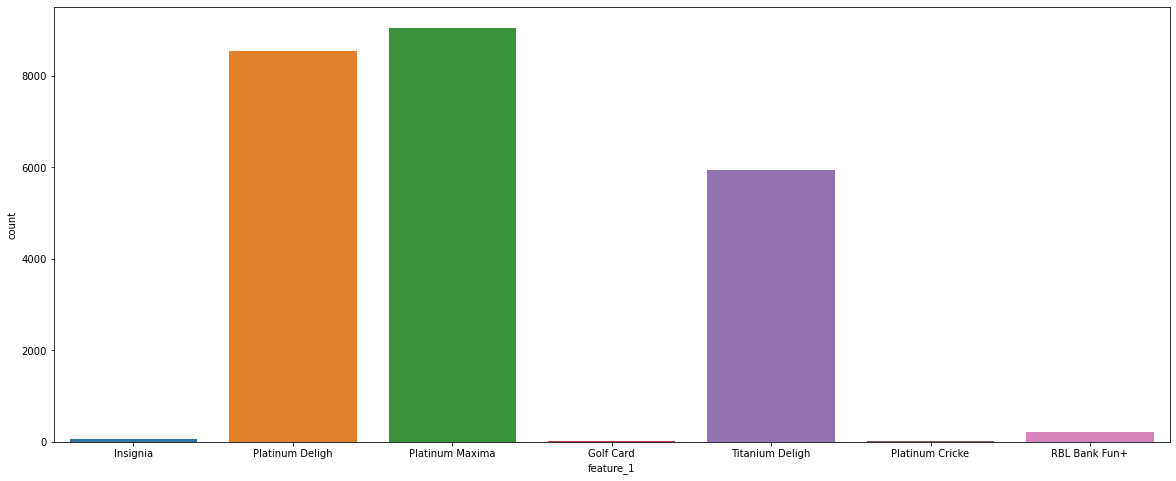

In [40]:
plt.figure(figsize= (20, 8))
sns.countplot(x='feature_1',data=data)
plt.show()

feature_1 is the type of credit card a customer holds.The above graph shows the count of the customers who holds the different kind of credit cards (Insigina,platinum deligh etc...)

In [41]:
data.feature_51.unique()

array(['State Bank of India', nan, 'HDFC Bank', 'Citibank N.A.',
       'American Express Banking Corporation', 'Kotak Mahindra Bank Ltd.',
       'AXIS Bank', 'IndusInd Bank Ltd.', 'ICICI Bank', 'HSBC Bank',
       'Standard Chartered Bank'], dtype=object)

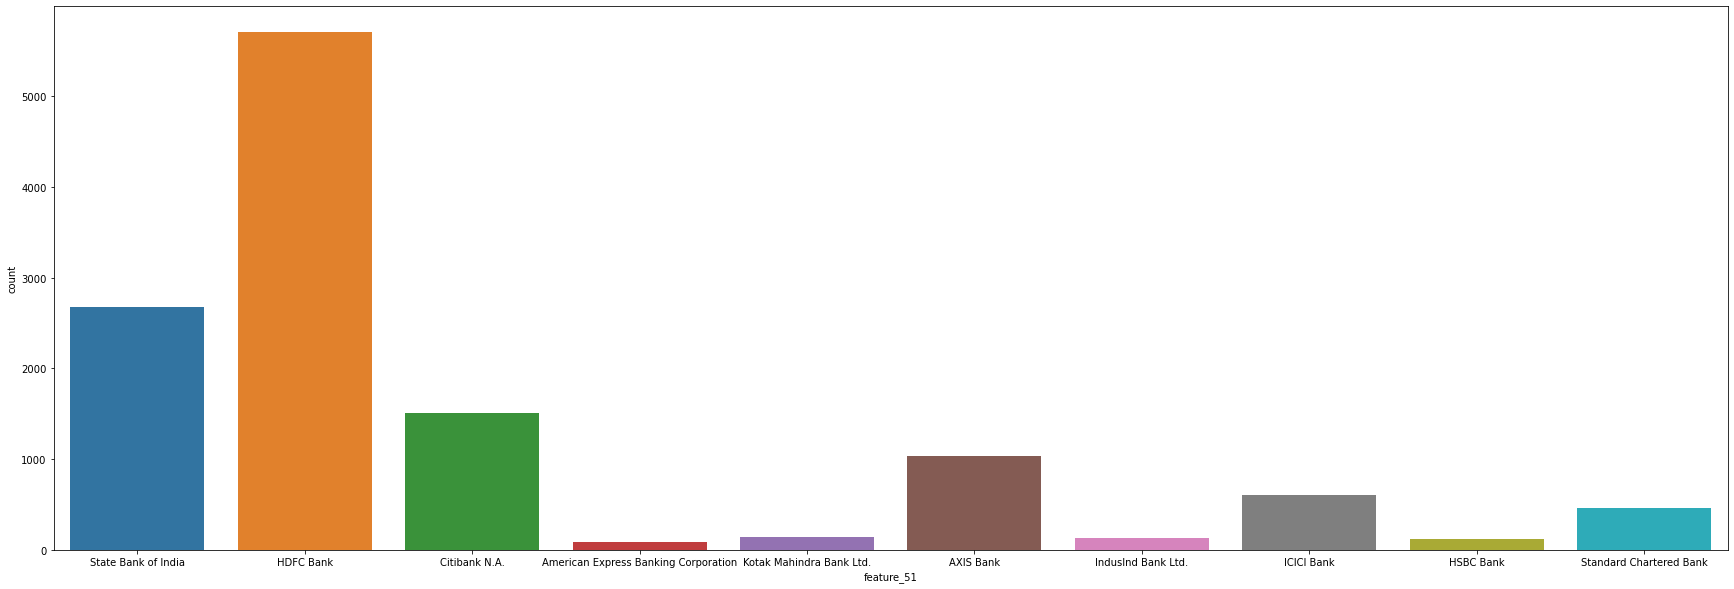

In [42]:
plt.figure(figsize= (30, 10))
sns.countplot(x='feature_51',data=data)
plt.show()

### feature_51 is the different banks to which customer belongs to.The above figure shows that count of customers and the bank to which  they belong .

## Bivariate Analysis

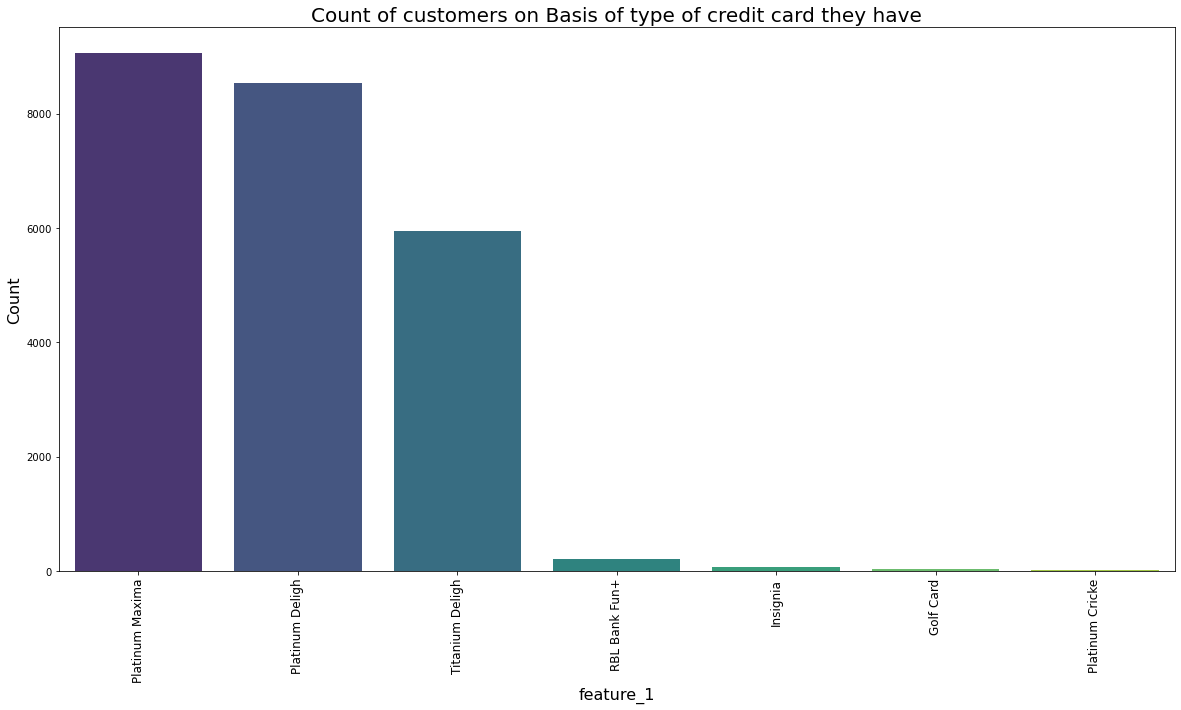

In [43]:
plt.figure(figsize= (20, 10))
ax = sns.countplot(x='feature_1', data= data, palette='viridis', order= data.feature_1.value_counts().iloc[:10].index)
ax.set_title(label='Count of customers on Basis of type of credit card they have', fontsize=20)
ax.set_xlabel(xlabel='feature_1', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

#### The above figure shows count of type of credit card the customer holds.Most of the customers hold platinum maxima card.

In [44]:
data.feature_48.unique()

array(['The Ratnakar Bank Ltd.', nan, 'AXIS Bank', 'HDFC Bank',
       'Kotak Mahindra Bank Ltd.', 'State Bank of India', 'ICICI Bank',
       'Canara Bank', 'Indian Overseas Bank', 'Union Bank of India',
       'Citibank N.A.', 'Oriental Bank of Commerce',
       'Standard Chartered Bank', 'Yes Bank', 'Bank of India',
       'IDBI Bank Ltd.', 'SBI Commercial and International',
       'Federal Bank', 'Punjab National Bank', 'Punjab &amp; Sind Bank',
       'Bank of Baroda', 'IndusInd Bank Ltd.', 'ING Vysya Bank Ltd.',
       'Syndicate Bank', 'Central Bank of India', 'Bank of Maharashtra',
       'HSBC Bank', 'Indian Bank', 'HDFC Ltd.', 'Royal Bank of Scotland',
       'Corporation Bank', 'State Bank of Travancore', 'Andhra Bank',
       'State Bank of Mysore', 'State Bank of Patiala',
       'Punjab &amp; Maharashtra Co-op. Bank Ltd.', 'Vijaya Bank',
       'Karnataka Bank Ltd.', 'Dena Bank',
       'State Bank of Bikaner &amp; Jaipur', 'UCO Bank',
       'Deutsche Bank AG', 'Karur V

In [45]:
data.feature_46.unique()

array(['PAN Card', nan, 'Aadhar Card', 'Passport', 'Driving License',
       'Voter ID'], dtype=object)

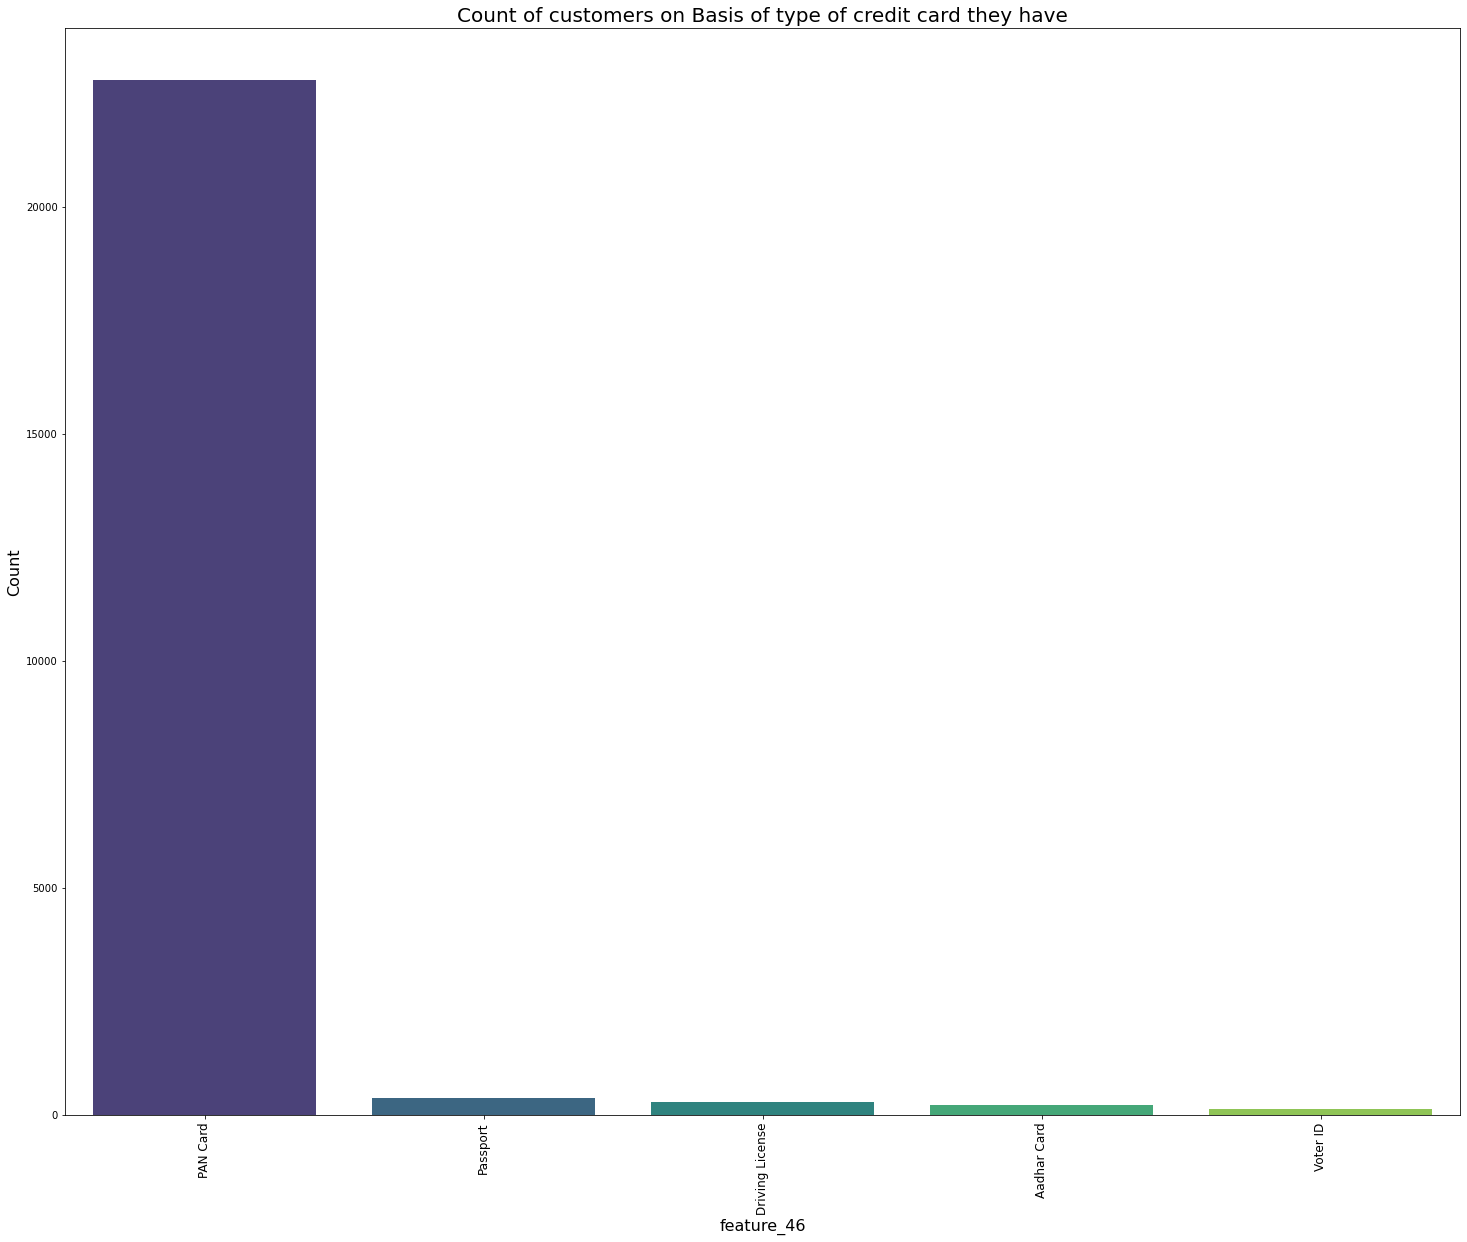

In [46]:
plt.figure(figsize= (25, 20))
ax = sns.countplot(x='feature_46', data= data, palette='viridis', order= data.feature_46.value_counts().iloc[:10].index)
ax.set_title(label='Count of customers on Basis of type of credit card they have', fontsize=20)
ax.set_xlabel(xlabel='feature_46', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

### From the above figure we can say that many customer has submitted there Pan card as ID proof

Text(0.5, 1.0, 'feature_1(type of credit card) v/s target\n')

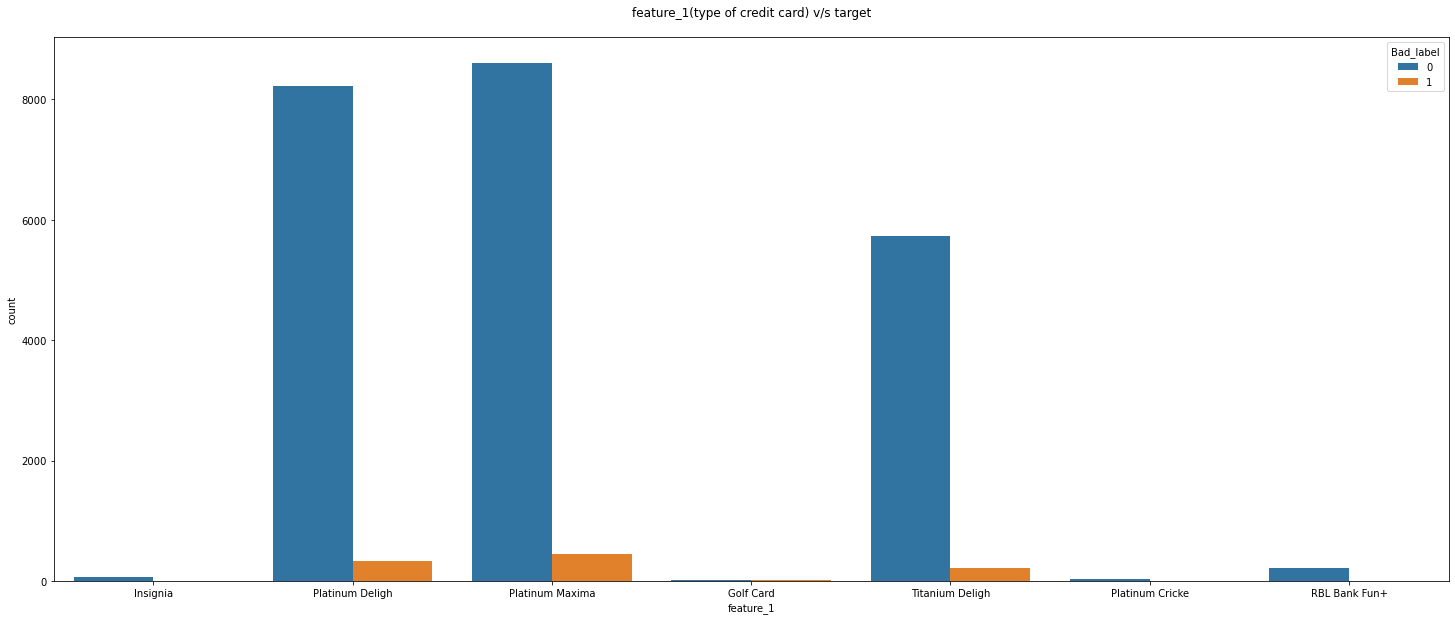

In [47]:
plt.figure(figsize= (25, 10))
sns.countplot(data= data, x='feature_1',hue='Bad_label')
plt.title('feature_1(type of credit card) v/s target\n')

#### The above graph compares type of credit card with bad label.We can observe that platinum card is given to the customer who has good credit score.

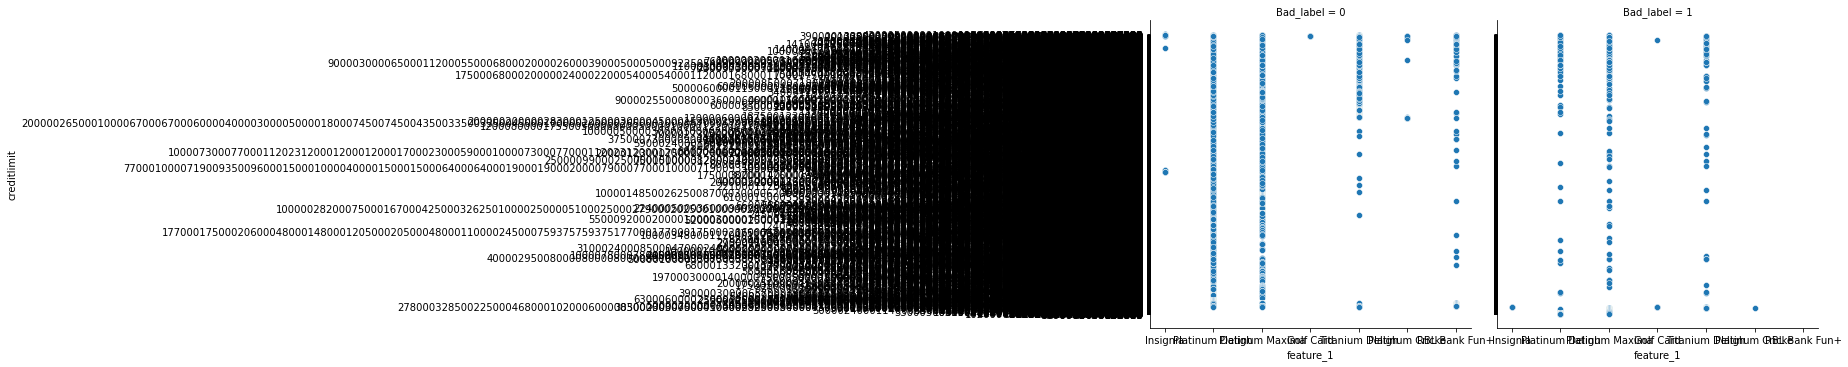

In [48]:
sns.relplot(x='feature_1',y='creditlimit',col='Bad_label',data=data)
plt.show()

## Feature Engineering

In [49]:
data.duplicated().sum()


0

In [50]:
#Finding list of numerical variables from the Data
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

#Visualise the numerical variables from the "numerical_features" data

data[numerical_features].head()

Number of numerical variables:  37


,Unnamed: 0,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,customer_no.1,total_enq_count
0,0,1,650.0,2.0,14.0,500000.0,0.0,1.0,1.0,2.0,400610.0,1965.0,0.0,2.0,90000.0,0.0,0.0,0.0,0.0,400059.0,NaN,0.0,1.0,21.0,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,NaN,0.0,1.0,0,1,18
1,1,2,760.0,1.0,14.0,1200000.0,0.0,1.0,1.0,2.0,560042.0,1969.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,NaN,0.0,1.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,NaN,0.0,1.0,0,10,21
2,2,3,774.0,1.0,14.0,700000.0,0.0,2.0,1.0,0.0,560042.0,1966.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,NaN,0.0,3.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,NaN,0.0,1.0,0,100,19
3,3,4,770.0,1.0,14.0,500000.0,0.0,1.0,1.0,3.0,411001.0,1988.0,0.0,2.0,100000.0,0.0,0.0,0.0,0.0,411026.0,NaN,0.0,1.0,21.0,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,NaN,1.0,1.0,0,1000,10
4,4,5,NaN,3.0,14.0,500000.0,0.0,1.0,1.0,3.0,122009.0,1995.0,0.0,2.0,300000.0,0.0,0.0,0.0,0.0,122009.0,NaN,0.0,1.0,13.0,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,NaN,0.0,1.0,0,10000,14


In [51]:
data1 = data.loc[:,['customer_no','feature_1','feature_4', 'feature_5', 
        'feature_6', 'feature_7','feature_11', 'feature_19', 
        'feature_23','feature_25', 'feature_26', 'feature_27','feature_29', 'feature_30',
        'feature_31', 'feature_32','feature_33', 'feature_34', 'feature_35', 'feature_36', 
        'feature_37', 'feature_40', 'feature_41', 'feature_42','feature_44',
        'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
        'feature_59', 'feature_60', 'feature_62','feature_64', 'feature_65', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_72','feature_76', 'feature_78', 
       'feature_79', 'Bad_label', 'high_credit_amt','cur_balance_amt',
        'creditlimit','cashlimit', 'total_enq_amt', 'total_enq_count']]

In [52]:
data1.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,250000420000,168000,3500000500000500005000010001000100010001000150...,18
1,2,Insignia,1.0,Card Setup,14.0,1200000.0,Y,1.0,N,1.0,2.0,NaN,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,0.0,0.0,0.0,560042.0,PAN Card,The Ratnakar Bank Ltd.,1.0,17.0,Y,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1000000117595,674724007,1000000,1,2000000200000002000000055000005500000100050000...,21
2,3,Insignia,1.0,Card Setup,14.0,700000.0,Y,2.0,N,1.0,0.0,NaN,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,0.0,0.0,0.0,560042.0,PAN Card,NaN,3.0,17.0,N,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,121523,17864,NaN,NaN,5000010000110000130000030000040000010000100001...,19
3,4,Insignia,1.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,NaN,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,0.0,0.0,0.0,411026.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,16.0,0.0,2.0,100000.0,21.0,R,1.0,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,394000262000300000,23600010500020000,10000100010000100001000050000500005000010001000,10
4,5,Insignia,3.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,NaN,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,0.0,0.0,0.0,122009.0,PAN Card,The Ratnakar Bank Ltd.,1.0,13.0,Y,Y,N,Y,13.0,3.0,0.0,2.0,300000.0,13.0,R,0.0,1.0,N,0,1501591266293822042204,7973000000,NaN,NaN,9000200002220005000010000050000500005000056250...,14


### Handling missing values

In [53]:
data1.shape

(23896, 50)

In [54]:
 #convert string to float 
data1['total_enq_amt'] = data1['total_enq_amt'].str.replace(',','').astype(np.float64)
data1['high_credit_amt'] = data1['high_credit_amt'].str.replace(',','').astype(np.float64)
data1['cur_balance_amt'] = data1['cur_balance_amt'].str.replace('-','').astype(np.float64)
data1['creditlimit'] = data1['creditlimit'].str.replace(',','').astype(np.float64)
data1['cashlimit'] = data1['cashlimit'].str.replace(',','').astype(np.float64)

In [55]:
#Replace infinite updated data with nan
data1.replace([np.inf, -np.inf], np.nan, inplace=True)
print(data1)

       customer_no        feature_1  feature_4   feature_5  feature_6  \
0                1         Insignia        2.0  Card Setup       14.0   
1                2         Insignia        1.0  Card Setup       14.0   
2                3         Insignia        1.0  Card Setup       14.0   
3                4         Insignia        1.0  Card Setup       14.0   
4                5         Insignia        3.0  Card Setup       14.0   
...            ...              ...        ...         ...        ...   
23891        23892  Platinum Deligh        1.0  Card Setup       14.0   
23892        23893  Platinum Deligh        2.0  Card Setup       14.0   
23893        23894  Platinum Maxima        3.0  Card Setup       14.0   
23894        23895  Platinum Deligh        3.0  Card Setup       14.0   
23895        23896  Titanium Deligh        1.0  Card Setup       14.0   

       feature_7 feature_11  feature_19 feature_23  feature_25  feature_26  \
0       500000.0          Y         1.0      

In [56]:
data1.isnull().sum()

customer_no            0
feature_1             15
feature_4             15
feature_5             15
feature_6             15
feature_7             15
feature_11            15
feature_19            15
feature_23            15
feature_25            15
feature_26            15
feature_27          3637
feature_29            15
feature_30            15
feature_31            15
feature_32            15
feature_33            15
feature_34            15
feature_35            15
feature_36          5682
feature_37          5682
feature_40            15
feature_41            15
feature_42            15
feature_44            15
feature_46            94
feature_48         18399
feature_55            15
feature_56            15
feature_58            15
feature_59            15
feature_60            15
feature_62            15
feature_64            15
feature_65            15
feature_67            15
feature_68            15
feature_69            15
feature_71            15
feature_72            15


In [57]:
data1.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,2.528846e+86,2.528847e+45,2.500004e+11,1.680000e+05,3.500001e+87,18
1,2,Insignia,1.0,Card Setup,14.0,1200000.0,Y,1.0,N,1.0,2.0,NaN,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,0.0,0.0,0.0,560042.0,PAN Card,The Ratnakar Bank Ltd.,1.0,17.0,Y,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1.000000e+12,6.747240e+08,1.000000e+06,1.000000e+00,2.000000e+122,21
2,3,Insignia,1.0,Card Setup,14.0,700000.0,Y,2.0,N,1.0,0.0,NaN,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,0.0,0.0,0.0,560042.0,PAN Card,NaN,3.0,17.0,N,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1.215230e+05,1.786400e+04,NaN,NaN,5.000010e+98,19
3,4,Insignia,1.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,NaN,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,0.0,0.0,0.0,411026.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,16.0,0.0,2.0,100000.0,21.0,R,1.0,1.0,N,0,4.449180e+89,1.637496e+30,3.940003e+17,2.360001e+16,1.000010e+46,10
4,5,Insignia,3.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,NaN,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,0.0,0.0,0.0,122009.0,PAN Card,The Ratnakar Bank Ltd.,1.0,13.0,Y,Y,N,Y,13.0,3.0,0.0,2.0,300000.0,13.0,R,0.0,1.0,N,0,1.501591e+21,7.973000e+09,NaN,NaN,9.000200e+71,14


In [58]:
data1.loc[:,['feature_36','feature_37','feature_46','feature_48']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   feature_36  18214 non-null  object
 1   feature_37  18214 non-null  object
 2   feature_46  23802 non-null  object
 3   feature_48  5497 non-null   object
dtypes: object(4)
memory usage: 746.9+ KB


In [59]:
data1.loc[:,['feature_36','feature_37','feature_46','feature_48']]=data1.loc[:,['feature_36','feature_37','feature_46','feature_48']].replace(np.nan,'others')
data1.shape

(23896, 50)

In [60]:
data1.drop_duplicates(inplace=True)
data1.shape

(23896, 50)

In [61]:
features_with_na=[features for features in data1.columns if data1[features].isnull().sum()>1]
features_with_na

['feature_1',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_11',
 'feature_19',
 'feature_23',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_44',
 'feature_55',
 'feature_56',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_62',
 'feature_64',
 'feature_65',
 'feature_67',
 'feature_68',
 'feature_69',
 'feature_71',
 'feature_72',
 'feature_76',
 'feature_78',
 'feature_79',
 'high_credit_amt',
 'creditlimit',
 'cashlimit',
 'total_enq_amt']

In [62]:
# First lets handle Categorical features which are missing
features_nan=[feature for feature in data1.columns if data1[feature].isnull().sum()>1 and data1[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data1[feature].isnull().mean(),4)))

feature_1: 0.0006% missing values
feature_5: 0.0006% missing values
feature_11: 0.0006% missing values
feature_23: 0.0006% missing values
feature_27: 0.1522% missing values
feature_32: 0.0006% missing values
feature_33: 0.0006% missing values
feature_58: 0.0006% missing values
feature_59: 0.0006% missing values
feature_60: 0.0006% missing values
feature_62: 0.0006% missing values
feature_72: 0.0006% missing values
feature_79: 0.0006% missing values


In [63]:
# Replace missing value with a new label
def replace_cat_feature(data1,features_nan):
    data2=data1.copy()
    data2[features_nan]=data2[features_nan].fillna(data1[features_nan].mode().iloc[0])
    return data2

data1=replace_cat_feature(data1,features_nan)

In [64]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in data1.columns if data1[feature].isnull().sum()>1 and data1[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data1[feature].isnull().mean(),4)))

feature_4: 0.0006% missing value
feature_6: 0.0006% missing value
feature_7: 0.0006% missing value
feature_19: 0.0006% missing value
feature_25: 0.0006% missing value
feature_26: 0.0006% missing value
feature_29: 0.0006% missing value
feature_30: 0.0006% missing value
feature_31: 0.0006% missing value
feature_34: 0.0006% missing value
feature_35: 0.0006% missing value
feature_40: 0.0006% missing value
feature_41: 0.0006% missing value
feature_42: 0.0006% missing value
feature_44: 0.0006% missing value
feature_55: 0.0006% missing value
feature_56: 0.0006% missing value
feature_64: 0.0006% missing value
feature_65: 0.0006% missing value
feature_67: 0.0006% missing value
feature_68: 0.0006% missing value
feature_69: 0.0006% missing value
feature_71: 0.0006% missing value
feature_76: 0.0006% missing value
feature_78: 0.0006% missing value
high_credit_amt: 0.0012% missing value
creditlimit: 0.1684% missing value
cashlimit: 0.2285% missing value
total_enq_amt: 0.0277% missing value


In [65]:
# Replace missing value with a new label
def replace_cat_feature(data1,numerical_with_nan):
    data2=data1.copy()
    data2[numerical_with_nan]=data2[numerical_with_nan].fillna(data1[numerical_with_nan].median().iloc[0])
    return data2

data1=replace_cat_feature(data1,numerical_with_nan)

In [66]:
data1.isnull().sum()

customer_no        0
feature_1          0
feature_4          0
feature_5          0
feature_6          0
feature_7          0
feature_11         0
feature_19         0
feature_23         0
feature_25         0
feature_26         0
feature_27         0
feature_29         0
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_40         0
feature_41         0
feature_42         0
feature_44         0
feature_46         0
feature_48         0
feature_55         0
feature_56         0
feature_58         0
feature_59         0
feature_60         0
feature_62         0
feature_64         0
feature_65         0
feature_67         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
feature_76         0
feature_78         0
feature_79         0
Bad_label          0
high_credit_amt    0
cur_balance_amt    0
creditlimit        0
cashlimit    

In [67]:
data1.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,Graduate,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,2.528846e+86,2.528847e+45,2.500004e+11,1.680000e+05,3.500001e+87,18
1,2,Insignia,1.0,Card Setup,14.0,1200000.0,Y,1.0,N,1.0,2.0,Graduate,560042.0,1969.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,The Ratnakar Bank Ltd.,1.0,17.0,Y,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1.000000e+12,6.747240e+08,1.000000e+06,1.000000e+00,2.000000e+122,21
2,3,Insignia,1.0,Card Setup,14.0,700000.0,Y,2.0,N,1.0,0.0,Graduate,560042.0,1966.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,others,3.0,17.0,N,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1.215230e+05,1.786400e+04,3.000000e+00,3.000000e+00,5.000010e+98,19
3,4,Insignia,1.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,Graduate,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,others,others,0.0,0.0,0.0,411026.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,16.0,0.0,2.0,100000.0,21.0,R,1.0,1.0,N,0,4.449180e+89,1.637496e+30,3.940003e+17,2.360001e+16,1.000010e+46,10
4,5,Insignia,3.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,Graduate,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,others,others,0.0,0.0,0.0,122009.0,PAN Card,The Ratnakar Bank Ltd.,1.0,13.0,Y,Y,N,Y,13.0,3.0,0.0,2.0,300000.0,13.0,R,0.0,1.0,N,0,1.501591e+21,7.973000e+09,3.000000e+00,3.000000e+00,9.000200e+71,14


In [68]:
data1.shape

(23896, 50)

In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23896 entries, 0 to 23895
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_no      23896 non-null  int64  
 1   feature_1        23896 non-null  object 
 2   feature_4        23896 non-null  float64
 3   feature_5        23896 non-null  object 
 4   feature_6        23896 non-null  float64
 5   feature_7        23896 non-null  float64
 6   feature_11       23896 non-null  object 
 7   feature_19       23896 non-null  float64
 8   feature_23       23896 non-null  object 
 9   feature_25       23896 non-null  float64
 10  feature_26       23896 non-null  float64
 11  feature_27       23896 non-null  object 
 12  feature_29       23896 non-null  float64
 13  feature_30       23896 non-null  float64
 14  feature_31       23896 non-null  float64
 15  feature_32       23896 non-null  object 
 16  feature_33       23896 non-null  object 
 17  feature_34  

In [70]:
df1=data1.copy()

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23896 entries, 0 to 23895
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_no      23896 non-null  int64  
 1   feature_1        23896 non-null  object 
 2   feature_4        23896 non-null  float64
 3   feature_5        23896 non-null  object 
 4   feature_6        23896 non-null  float64
 5   feature_7        23896 non-null  float64
 6   feature_11       23896 non-null  object 
 7   feature_19       23896 non-null  float64
 8   feature_23       23896 non-null  object 
 9   feature_25       23896 non-null  float64
 10  feature_26       23896 non-null  float64
 11  feature_27       23896 non-null  object 
 12  feature_29       23896 non-null  float64
 13  feature_30       23896 non-null  float64
 14  feature_31       23896 non-null  float64
 15  feature_32       23896 non-null  object 
 16  feature_33       23896 non-null  object 
 17  feature_34  

In [72]:
# Apply Enconding method to convert categorical data to numeric.

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [73]:
to_enc=['feature_1','feature_5','feature_11','feature_23','feature_27','feature_32',
                'feature_33','feature_36','feature_37','feature_46','feature_48','feature_58',
                'feature_59','feature_60','feature_62','feature_72','feature_79']

for i in to_enc:
     data1[i]=enc.fit_transform(data1[i])


In [74]:
data1.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,1,2.0,0,14.0,500000.0,1,1.0,0,1.0,2.0,5,400610.0,1965.0,0.0,4,1,2.0,90000.0,9,11,0.0,0.0,0.0,400059.0,2,50,1.0,21.0,1,1,0,1,21.0,15.0,0.0,2.0,90000.0,21.0,1,0.0,1.0,0,0,2.528846e+86,2.528847e+45,2.500004e+11,1.680000e+05,3.500001e+87,18
1,2,1,1.0,0,14.0,1200000.0,1,1.0,0,1.0,2.0,5,560042.0,1969.0,0.0,4,1,2.0,1.0,9,11,0.0,0.0,0.0,560042.0,2,50,1.0,17.0,1,1,0,1,17.0,12.0,0.0,2.0,1.0,17.0,1,0.0,1.0,0,0,1.000000e+12,6.747240e+08,1.000000e+06,1.000000e+00,2.000000e+122,21
2,3,1,1.0,0,14.0,700000.0,1,2.0,0,1.0,0.0,5,560042.0,1966.0,0.0,4,1,2.0,1.0,9,11,0.0,0.0,0.0,560042.0,2,56,3.0,17.0,0,1,0,1,17.0,12.0,0.0,2.0,1.0,17.0,1,0.0,1.0,0,0,1.215230e+05,1.786400e+04,3.000000e+00,3.000000e+00,5.000010e+98,19
3,4,1,1.0,0,14.0,500000.0,1,1.0,0,1.0,3.0,5,411001.0,1988.0,0.0,4,1,2.0,100000.0,9,11,0.0,0.0,0.0,411026.0,2,50,1.0,21.0,1,1,0,1,21.0,16.0,0.0,2.0,100000.0,21.0,1,1.0,1.0,0,0,4.449180e+89,1.637496e+30,3.940003e+17,2.360001e+16,1.000010e+46,10
4,5,1,3.0,0,14.0,500000.0,1,1.0,0,1.0,3.0,5,122009.0,1995.0,0.0,4,1,2.0,300000.0,9,11,0.0,0.0,0.0,122009.0,2,50,1.0,13.0,1,1,0,1,13.0,3.0,0.0,2.0,300000.0,13.0,1,0.0,1.0,0,0,1.501591e+21,7.973000e+09,3.000000e+00,3.000000e+00,9.000200e+71,14


In [80]:
df1.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,Graduate,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,2.528846e+86,2.528847e+45,2.500004e+11,1.680000e+05,3.500001e+87,18
1,2,Insignia,1.0,Card Setup,14.0,1200000.0,Y,1.0,N,1.0,2.0,Graduate,560042.0,1969.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,The Ratnakar Bank Ltd.,1.0,17.0,Y,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1.000000e+12,6.747240e+08,1.000000e+06,1.000000e+00,2.000000e+122,21
2,3,Insignia,1.0,Card Setup,14.0,700000.0,Y,2.0,N,1.0,0.0,Graduate,560042.0,1966.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,others,3.0,17.0,N,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1.215230e+05,1.786400e+04,3.000000e+00,3.000000e+00,5.000010e+98,19
3,4,Insignia,1.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,Graduate,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,others,others,0.0,0.0,0.0,411026.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,16.0,0.0,2.0,100000.0,21.0,R,1.0,1.0,N,0,4.449180e+89,1.637496e+30,3.940003e+17,2.360001e+16,1.000010e+46,10
4,5,Insignia,3.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,3.0,Graduate,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,others,others,0.0,0.0,0.0,122009.0,PAN Card,The Ratnakar Bank Ltd.,1.0,13.0,Y,Y,N,Y,13.0,3.0,0.0,2.0,300000.0,13.0,R,0.0,1.0,N,0,1.501591e+21,7.973000e+09,3.000000e+00,3.000000e+00,9.000200e+71,14


In [77]:
# To check if the data is balanced.

data1.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

In [78]:
df1.isna().sum()

customer_no        0
feature_1          0
feature_4          0
feature_5          0
feature_6          0
feature_7          0
feature_11         0
feature_19         0
feature_23         0
feature_25         0
feature_26         0
feature_27         0
feature_29         0
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_40         0
feature_41         0
feature_42         0
feature_44         0
feature_46         0
feature_48         0
feature_55         0
feature_56         0
feature_58         0
feature_59         0
feature_60         0
feature_62         0
feature_64         0
feature_65         0
feature_67         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
feature_76         0
feature_78         0
feature_79         0
Bad_label          0
high_credit_amt    0
cur_balance_amt    0
creditlimit        0
cashlimit    

In [81]:
#Scaling the data using MinMaxScaler.

feature_scale=[feature for feature in df1.columns if feature not in ['Bad_label']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data1[feature_scale])

MinMaxScaler()

In [84]:
scaler.transform(data1[feature_scale])

array([[0.00000000e+000, 1.66666667e-001, 5.00000000e-001, ...,
        5.45449527e-089, 2.33325589e-221, 5.53745928e-002],
       [4.18497594e-005, 1.66666667e-001, 0.00000000e+000, ...,
        0.00000000e+000, 1.33328902e-186, 6.51465798e-002],
       [8.36995187e-005, 1.66666667e-001, 0.00000000e+000, ...,
        6.49348540e-094, 3.33322889e-210, 5.86319218e-002],
       ...,
       [9.99916300e-001, 6.66666667e-001, 1.00000000e+000, ...,
        2.27239522e-090, 6.66677777e-234, 5.21172638e-002],
       [9.99958150e-001, 5.00000000e-001, 1.00000000e+000, ...,
        9.64285829e-085, 3.33325556e-280, 1.62866450e-002],
       [1.00000000e+000, 1.00000000e+000, 0.00000000e+000, ...,
        6.88323086e-086, 3.33322889e-240, 4.23452769e-002]])

In [87]:
data = pd.concat([data1[['Bad_label']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data1[feature_scale]), columns=feature_scale)],
                    axis=1)

In [88]:
data.head()

,Bad_label,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,high_credit_amt,cur_balance_amt,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,0,0.000000,0.166667,0.5,0.0,1.0,0.410846,1.0,0.0,0.0,0.0,0.2,0.555556,0.562459,0.975149,0.0,1.0,1.0,0.5,0.006000,1.0,1.0,0.0,0.0,0.0,0.561722,0.4,0.892857,0.000000,0.575758,1.0,1.0,0.0,1.0,0.575758,0.001399,0.0,0.5,0.006000,0.575758,1.0,0.00,0.0,0.0,2.006670e-215,1.798641e-203,1.250000e-164,5.454495e-89,2.333256e-221,0.055375
1,0,0.000042,0.166667,0.0,0.0,1.0,0.986031,1.0,0.0,0.0,0.0,0.2,0.555556,0.786304,0.977137,0.0,1.0,1.0,0.5,0.000000,1.0,1.0,0.0,0.0,0.0,0.786354,0.4,0.892857,0.000000,0.454545,1.0,1.0,0.0,1.0,0.454545,0.001099,0.0,0.5,0.000000,0.454545,1.0,0.00,0.0,0.0,7.935123e-290,4.798972e-240,4.999978e-170,0.000000e+00,1.333289e-186,0.065147
2,0,0.000084,0.166667,0.0,0.0,1.0,0.575185,1.0,0.5,0.0,0.0,0.0,0.555556,0.786304,0.975646,0.0,1.0,1.0,0.5,0.000000,1.0,1.0,0.0,0.0,0.0,0.786354,0.4,1.000000,0.666667,0.454545,0.0,1.0,0.0,1.0,0.454545,0.001099,0.0,0.5,0.000000,0.454545,1.0,0.00,0.0,0.0,9.642761e-297,1.270576e-244,0.000000e+00,6.493485e-94,3.333229e-210,0.058632
3,0,0.000126,0.166667,0.0,0.0,1.0,0.410846,1.0,0.0,0.0,0.0,0.3,0.555556,0.577048,0.986581,0.0,1.0,1.0,0.5,0.006667,1.0,1.0,0.0,0.0,0.0,0.577121,0.4,0.892857,0.000000,0.575758,1.0,1.0,0.0,1.0,0.575758,0.001499,0.0,0.5,0.006667,0.575758,1.0,0.25,0.0,0.0,3.530479e-212,1.164668e-218,1.969999e-158,7.662316e-78,6.666511e-263,0.029316
4,0,0.000167,0.166667,1.0,0.0,1.0,0.410846,1.0,0.0,0.0,0.0,0.3,0.555556,0.171299,0.990060,0.0,1.0,1.0,0.5,0.020000,1.0,1.0,0.0,0.0,0.0,0.171313,0.4,0.892857,0.000000,0.333333,1.0,1.0,0.0,1.0,0.333333,0.000200,0.0,0.5,0.020000,0.333333,1.0,0.00,0.0,0.0,1.191531e-280,5.670794e-239,0.000000e+00,6.493485e-94,5.999933e-237,0.042345


In [89]:
data.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

In [90]:
# Split X and Y
X = data.drop(columns = ['Bad_label'])
y = data['Bad_label']

In [91]:
# Since data(target variable) is not balamced,we have to balance data using smote.

from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({0: 22892, 1: 1004})
balanced data:    : Counter({0: 22892, 1: 22892})


## Model Creation

In [92]:
# splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42)

## Support Vector Machine

In [93]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [94]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [103]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8679888170539927
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5731
           1       0.83      0.93      0.88      5715

    accuracy                           0.87     11446
   macro avg       0.87      0.87      0.87     11446
weighted avg       0.87      0.87      0.87     11446



In [104]:
confusion_matrix(y_test,y_predict_svm)

array([[4644, 1087],
       [ 424, 5291]], dtype=int64)

## Decision Tree with GridSearchCV

In [106]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [107]:
model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 4}

In [108]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [109]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9298444871570855
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5731
           1       0.92      0.94      0.93      5715

    accuracy                           0.93     11446
   macro avg       0.93      0.93      0.93     11446
weighted avg       0.93      0.93      0.93     11446



In [110]:
confusion_matrix(y_test,y_predict_dtree)

array([[5273,  458],
       [ 345, 5370]], dtype=int64)

## Random Forest with GridSearchCV

In [111]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [112]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [113]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [114]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.97754674121964
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5731
           1       0.99      0.96      0.98      5715

    accuracy                           0.98     11446
   macro avg       0.98      0.98      0.98     11446
weighted avg       0.98      0.98      0.98     11446



In [115]:
confusion_matrix(y_test,y_predict_rf)

array([[5687,   44],
       [ 213, 5502]], dtype=int64)

#  K-Nearest Neighbor

In [116]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [117]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [118]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8500786300891141
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      5731
           1       0.77      0.99      0.87      5715

    accuracy                           0.85     11446
   macro avg       0.88      0.85      0.85     11446
weighted avg       0.88      0.85      0.85     11446



In [119]:
confusion_matrix(y_test,y_predict_knn)

array([[4070, 1661],
       [  55, 5660]], dtype=int64)

#  XGBoost Classifier

In [120]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [121]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [122]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9765857067971344
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5731
           1       1.00      0.95      0.98      5715

    accuracy                           0.98     11446
   macro avg       0.98      0.98      0.98     11446
weighted avg       0.98      0.98      0.98     11446



In [123]:
confusion_matrix(y_test,y_predict_xgb)

array([[5723,    8],
       [ 260, 5455]], dtype=int64)

### Conclusion

- Domain Analysis and understanding the data.
- Handling missing values.
- feature selection.

In [124]:
from prettytable import PrettyTable

#Creating objects of Prettytable
x=PrettyTable()
y=PrettyTable()

In [125]:
x.field_names = ["Model(Test)","Accuracy" ,"F1_Score","Recall","Precision"]
x.add_row(["K-Nearest Neighbor", '0.85','0.87','0.99','0.77'])
x.add_row(["Support Vector Machine", '0.86','0.87','0.93','0.82'])
x.add_row(["Random Forest", '0.98', '0.98','0.96','0.97'])
x.add_row(["Decision Tree", '0.93', '0.93','0.94','0.93'])
x.add_row(["XG Boost classifier", '0.98', '0.98','0.95','0.96'])

In [126]:
print(x)

+------------------------+----------+----------+--------+-----------+
|      Model(Test)       | Accuracy | F1_Score | Recall | Precision |
+------------------------+----------+----------+--------+-----------+
|   K-Nearest Neighbor   |   0.85   |   0.87   |  0.99  |    0.77   |
| Support Vector Machine |   0.86   |   0.87   |  0.93  |    0.82   |
|     Random Forest      |   0.98   |   0.98   |  0.96  |    0.97   |
|     Decision Tree      |   0.93   |   0.93   |  0.94  |    0.93   |
|  XG Boost classifier   |   0.98   |   0.98   |  0.95  |    0.96   |
+------------------------+----------+----------+--------+-----------+


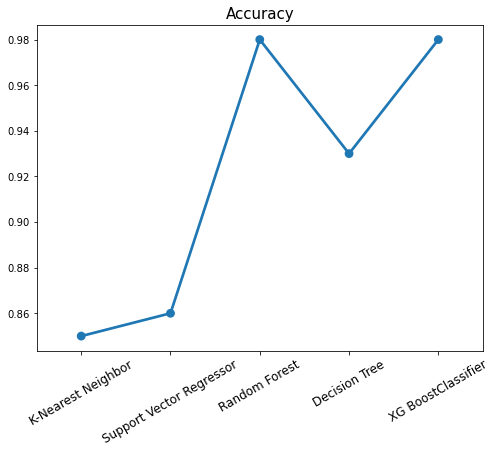

In [127]:
data = { 'K-Nearest Neighbor':0.85,'Support Vector Regressor':0.86,'Random Forest':0.98,'Decision Tree':0.93,'XG BoostClassifier':0.98}

courses = list(data.keys())
values = list(data.values())

plt.figure(figsize=(8,6))
sns.pointplot(x=courses, y=values)
plt.title("Accuracy", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

We have tried with five different machine learning algorithms on the dataset

- KNN
- Random Forest
- SVM
- Decision Tree
- XG Boost Classifier

After observing all the models,we have found out that Random forest and XG Boost model is giving us the best score and is the optimized model for the given dataset..